In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

In [30]:
# Load image
img = cv2.imread('shapes.png', cv2.IMREAD_GRAYSCALE)

In [31]:
# Threshold to binary
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 1️⃣ Connected Component Labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)


# 2️⃣ Size Filtering (remove very small objects)
min_size = 200
binary_filtered = np.zeros_like(binary)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        binary_filtered[labels == i] = 255

# 3️⃣ Skeletonization
skeleton = skeletonize(binary_filtered // 255)
skeleton = np.uint8(skeleton * 255)


In [32]:
# 4️⃣ Contour and Boundary Detection
contours, _ = cv2.findContours(binary_filtered, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)


array([[[112, 112, 112],
        [119, 119, 119],
        [130, 130, 130],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[123, 123, 123],
        [130, 130, 130],
        [142, 142, 142],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[129, 129, 129],
        [137, 137, 137],
        [150, 150, 150],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [124, 124, 124],
        ...,
        [ 61,  61,  61],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [33]:
# 5️⃣ Shape Features (Moments, Centroids)
for i, cnt in enumerate(contours):
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(img_contours, (cx, cy), 4, (0, 0, 255), -1)
        cv2.putText(img_contours, f"Obj {i+1}", (cx-20, cy-20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 1)
        huMoments = cv2.HuMoments(M).flatten()
        print(f"Object {i+1} Hu Moments: {np.round(huMoments, 4)}")


Object 1 Hu Moments: [ 0.9954  0.9606  0.0077  0.0064  0.      0.0062 -0.    ]
Object 2 Hu Moments: [ 0.2211  0.0207  0.      0.     -0.     -0.     -0.    ]
Object 3 Hu Moments: [4.205e-01 1.208e-01 6.840e-02 4.700e-02 2.700e-03 1.620e-02 1.000e-04]
Object 4 Hu Moments: [ 0.8488  0.6599  0.0025  0.0053  0.      0.0043 -0.    ]
Object 5 Hu Moments: [5.4979000e+00 3.0189100e+01 4.7194000e+01 4.7080400e+01 2.2192324e+03
 2.5868060e+02 3.7000000e-03]
Object 6 Hu Moments: [ 3.836e-01  1.067e-01  1.900e-03  7.000e-04  0.000e+00  2.000e-04
 -0.000e+00]
Object 7 Hu Moments: [0.6463 0.3836 0.01   0.0032 0.     0.001  0.    ]
Object 8 Hu Moments: [ 0.2513  0.0354  0.      0.      0.      0.     -0.    ]
Object 9 Hu Moments: [ 0.3283  0.08    0.      0.     -0.     -0.     -0.    ]
Object 10 Hu Moments: [ 2.219e-01  2.190e-02  1.000e-04  0.000e+00 -0.000e+00 -0.000e+00
  0.000e+00]
Object 11 Hu Moments: [ 0.5558  0.2427  0.0346  0.0215  0.0006  0.0102 -0.    ]
Object 12 Hu Moments: [ 0.4809  0.1

In [34]:
# 6️⃣ Boundary Descriptor – Chain Code (for 1st contour)
cnt = contours[0]
chain_code = []
for j in range(len(cnt) - 1):
    diff = cnt[j+1][0] - cnt[j][0]
    direction = (np.arctan2(diff[1], diff[0]) * 180 / np.pi)
    chain_code.append(direction)
print(f"\nChain code directions (degrees): {np.round(chain_code[:10], 2)} ...")



Chain code directions (degrees): [135. 180. 135.  90.   0.  45.   0.  45.   0. -45.] ...


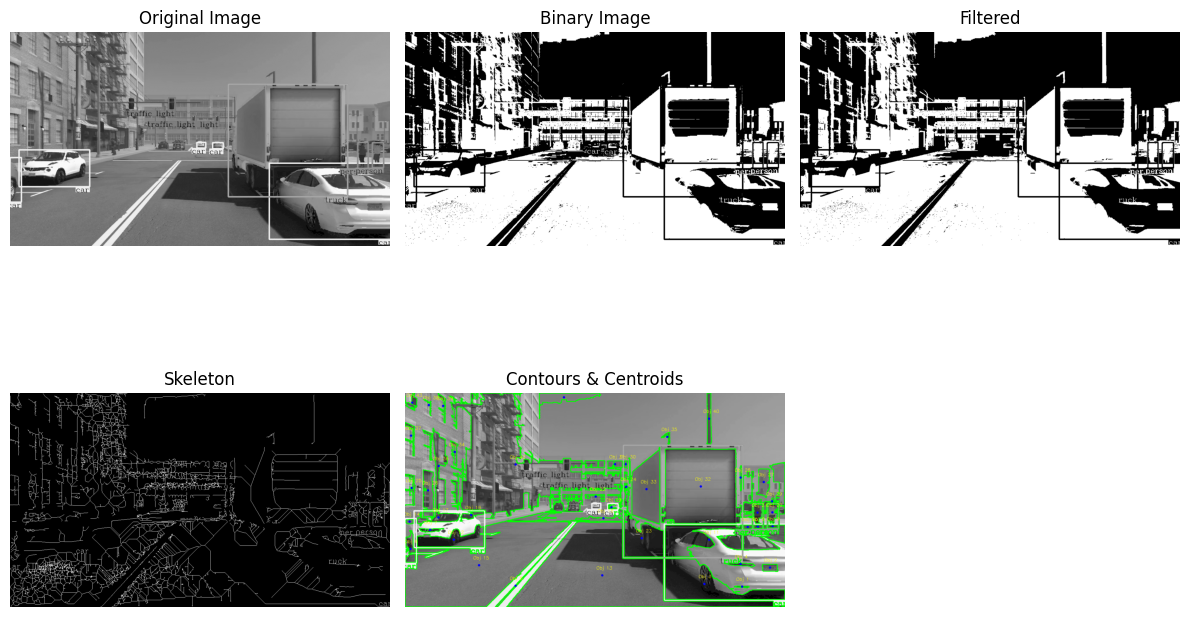

In [35]:
# Display results
titles = ['Original Image', 'Binary Image', 'Filtered', 'Skeleton', 'Contours & Centroids']
images = [img, binary, binary_filtered, skeleton, img_contours]

plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
